In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model as skl_lm
from sklearn.model_selection import train_test_split
import seaborn as sns


In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/vincenzorrei/EDU-Datasets/refs/heads/main/Default.csv')

# We set the first column as the index since it is not a variable
df.set_index('Unnamed: 0', inplace=True)

# Note: factorize() returns two objects: a label array and an array with the unique values.
# We are only interested in the first object.
# We transform 'No' to 0 and 'Yes' to 1
df['default_enc'] = df.default.factorize()[0] # df['default'].factorize() returns a tuple, we only need the first element
df['student_enc'] = df.student.factorize()[0]
# We assign the variables X and y
x = df['balance'].values.reshape(-1,1) # scikit-learn expects a 2D array not a pd.Series :(
y = df['default_enc']
# Fit the model
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)
clf = skl_lm.LogisticRegression()
clf.fit(X_train,y_train)
x_proba = clf.predict_proba([X_train[0]])
x_pred = clf.predict([X_train[0]])
X_space = np.arange(df.balance.min(), df.balance.max()).reshape(-1,1)
prob = clf.predict_proba(X_space)


In [4]:
color_blue = "#1a559e"
color_pink = "#e71d71"
color_black = "#0070c0"

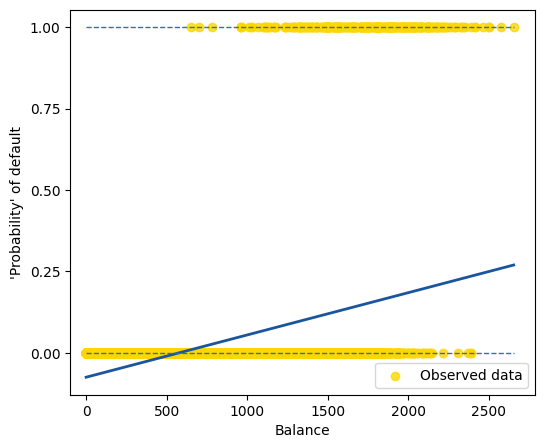

In [5]:
plt.figure(figsize=(6,5))
sns.regplot(x=df.balance, y=df.default_enc, order=1, ci=None,
            scatter_kws={'color':'gold'},
            line_kws={'color':color_blue, 'lw':2}, label='Observed data')
# Retrieve the current Axes object to get x-axis data limits
ax = plt.gca()

# Dashed horizontal line at y=1
ax.hlines(
    y=1,
    xmin=ax.xaxis.get_data_interval()[0],
    xmax=ax.xaxis.get_data_interval()[1],
    linestyles='dashed',
    lw=1
)

# Dashed horizontal line at y=0
ax.hlines(
    y=0,
    xmin=ax.xaxis.get_data_interval()[0],
    xmax=ax.xaxis.get_data_interval()[1],
    linestyles='dashed',
    lw=1
)
# Label axes and set y-ticks and x-limit
plt.ylabel("'Probability' of default")
plt.xlabel('Balance')
plt.yticks([0, 0.25, 0.5, 0.75, 1.])
plt.xlim(xmin=-100)

# Optionally show legend
plt.legend()

plt.show()

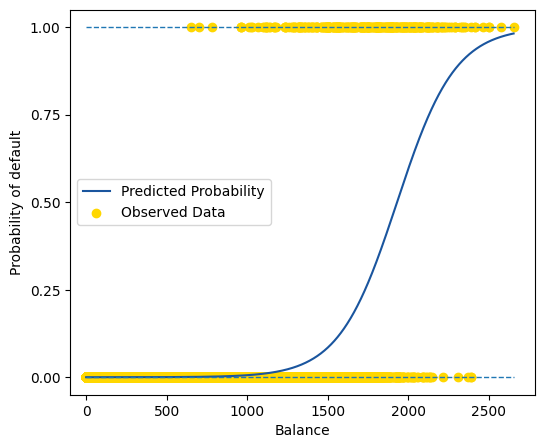

In [6]:
plt.figure(figsize=(6,5))

# Plot predicted probabilities (lightblue line)
plt.plot(X_space, prob[:, 1], color=color_blue, label='Predicted Probability')

# Scatter plot of observed data (orange points)
plt.scatter(x, y, color='gold', label='Observed Data')

# Retrieve the current Axes object to get x-axis data limits
ax = plt.gca()

# Dashed horizontal line at y=1
ax.hlines(
    y=1,
    xmin=ax.xaxis.get_data_interval()[0],
    xmax=ax.xaxis.get_data_interval()[1],
    linestyles='dashed',
    lw=1
)

# Dashed horizontal line at y=0
ax.hlines(
    y=0,
    xmin=ax.xaxis.get_data_interval()[0],
    xmax=ax.xaxis.get_data_interval()[1],
    linestyles='dashed',
    lw=1
)

# Label axes and set y-ticks and x-limit
plt.ylabel('Probability of default')
plt.xlabel('Balance')
plt.yticks([0, 0.25, 0.5, 0.75, 1.])
plt.xlim(xmin=-100)

# Optionally show legend
plt.legend()

plt.show()


In [7]:
# Let's suppose we have a new observation with balance = 2500
# We can calculate the probability of default
new_balance_obs = 2000
prob_new_obs = clf.predict_proba([[new_balance_obs]])[:,1][0]
print(f'Prob of default with balance = {str(new_balance_obs)}: {round(prob_new_obs*100,2)}%')

Prob of default with balance = 2000: 59.52%


C:\Users\vinor\AppData\Local\Temp\ipykernel_56268\4168626904.py:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "gx" (-> color='g'). The keyword argument will take precedence.
  plt.plot(new_balance_obs, prob_new_obs, 'gx', label='New observation prediction', color=color_pink)
C:\Users\vinor\AppData\Local\Temp\ipykernel_56268\4168626904.py:21: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go" (-> color='g'). The keyword argument will take precedence.
  plt.plot(new_balance_obs, 0, 'go', label='New observation', color=color_pink)


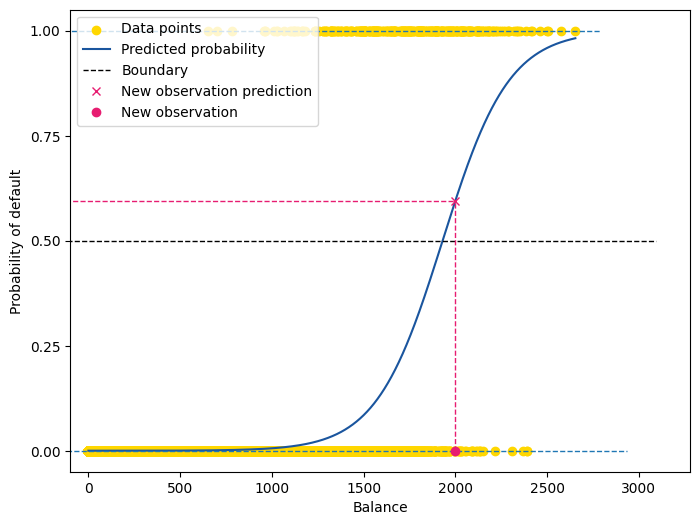

In [8]:
# Plot the graph
plt.figure(figsize=(8, 6))

# Scatter plot and line plot
plt.scatter(x, y, color='gold', label='Data points')
plt.plot(X_space, prob[:, 1], color=color_blue, label='Predicted probability')

# Add horizontal lines upper bound
plt.hlines(1, xmin=plt.gca().get_xlim()[0],
           xmax=plt.gca().get_xlim()[1], linestyles='dashed', lw=1)
# Add horizontal lines lower bound
plt.hlines(0, xmin=plt.gca().get_xlim()[0],
           xmax=plt.gca().get_xlim()[1], linestyles='dashed', lw=1)
# Add horizontal lines, the discriminant boundary
plt.hlines(0.5, xmin=plt.gca().get_xlim()[0],
           xmax=plt.gca().get_xlim()[1], linestyles='dashed', lw=1, colors='black', label='Boundary')
# Add new observation
plt.vlines(new_balance_obs, ymin=0, ymax=prob_new_obs, linestyles='dashed', lw=1, colors=color_pink)
plt.hlines(prob_new_obs, xmin=plt.gca().get_xlim()[0], xmax=new_balance_obs, linestyles='dashed', lw=1, colors=color_pink)
plt.plot(new_balance_obs, prob_new_obs, 'gx', label='New observation prediction', color=color_pink)
plt.plot(new_balance_obs, 0, 'go', label='New observation', color=color_pink)


# Set labels and ticks
plt.ylabel('Probability of default')
plt.xlabel('Balance')
plt.yticks([0, 0.25, 0.5, 0.75, 1.])
plt.xlim(xmin=-100)

# Add legend
plt.legend(loc='upper left')

# Show plot
plt.show()

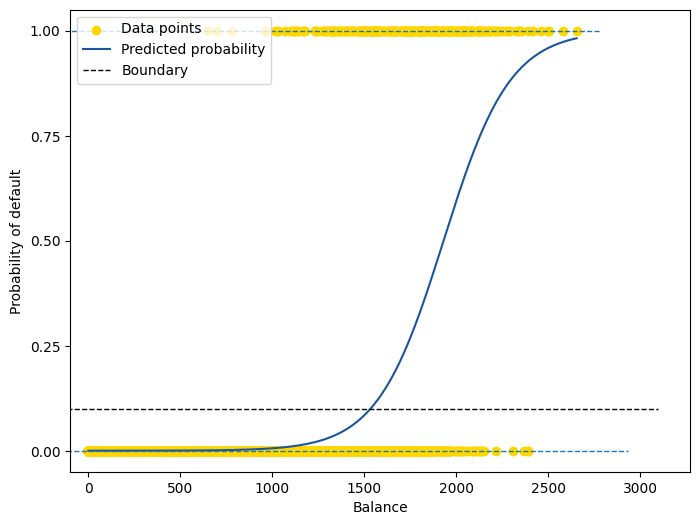

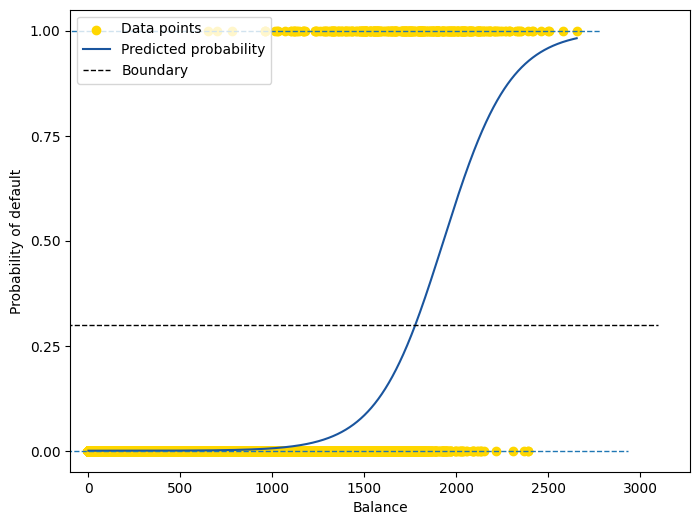

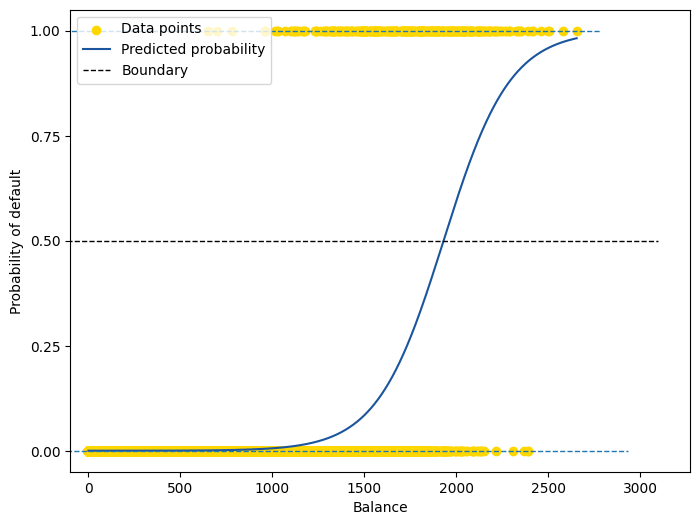

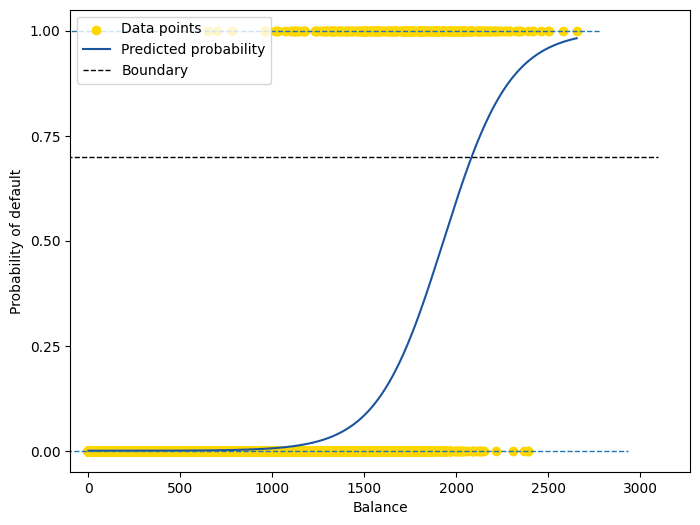

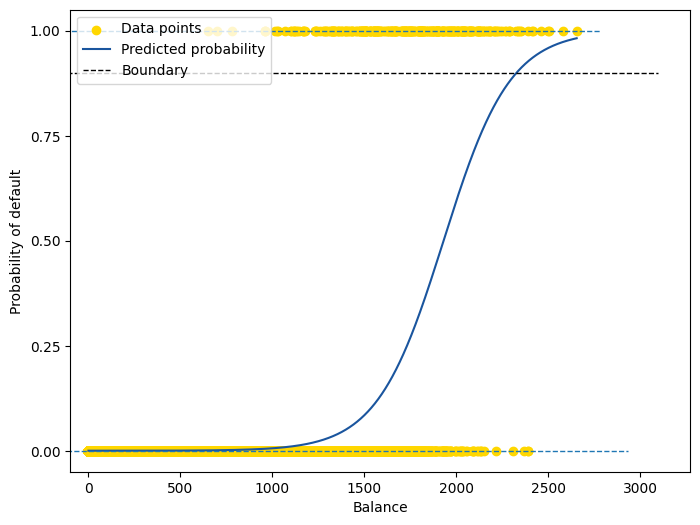

In [11]:

for i in [0.1, 0.3, 0.5, 0.7, 0.9]:
    
    # Plot the graph
    plt.figure(figsize=(8, 6))

    # Scatter plot and line plot
    plt.scatter(x, y, color='gold', label='Data points')
    plt.plot(X_space, prob[:, 1], color=color_blue, label='Predicted probability')

    # Add horizontal lines upper bound
    plt.hlines(1, xmin=plt.gca().get_xlim()[0],
            xmax=plt.gca().get_xlim()[1], linestyles='dashed', lw=1)
    # Add horizontal lines lower bound
    plt.hlines(0, xmin=plt.gca().get_xlim()[0],
            xmax=plt.gca().get_xlim()[1], linestyles='dashed', lw=1)
    # Add horizontal lines, the discriminant boundary
    plt.hlines(i, xmin=plt.gca().get_xlim()[0],
            xmax=plt.gca().get_xlim()[1], linestyles='dashed', lw=1, colors='black', label='Boundary')



    # Set labels and ticks
    plt.ylabel('Probability of default')
    plt.xlabel('Balance')
    plt.yticks([0, 0.25, 0.5, 0.75, 1.])
    plt.xlim(xmin=-100)

    # Add legend
    plt.legend(loc='upper left')

    # Show plot
    plt.show()